In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
pf = pd.read_csv("analytics_employee_attrition.csv")
pf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Análisis de datos

In [119]:
def getDateColTypes(pf):
       categoricas = []
       continuas = []
       discretas = []

       for colName in pf.columns:
              if (pf[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((pf[colName].dtype == 'int64') or (pf[colName].dtypes == 'float64')):
                            if(len(pf[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas

In [120]:
discretas, continuas, categoricas = getDateColTypes(pf)

In [121]:
continuas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [122]:
categoricas.remove('BusinessTravel')

In [123]:
def plotCatColumn_vrs_Target(pf, colname, target):
       plt.figure(figsize=(10, 5))
       plot = sns.countplot(x=pf[colname], hue=pf[target])
       plt.title(f'{colname}  vrs {target}')

       for p in plot.patches:
              plt.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 50))

       plt.show()

In [124]:
def getCategoryVars(pf):
    cat_colnames = []
    colnames = pf.columns
    for col in colnames:
         if(pf[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames


In [125]:
cat_cols = getCategoryVars(pf)
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [126]:
pf_categories=pf[cat_cols]
pf_categories.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


### Balanceo de Categorías en el Target

In [127]:
pf = pd.read_csv("analytics_employee_attrition.csv")
pf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [128]:
discretas, continuas, categoricas = getDateColTypes(pf)

In [129]:
categoricas.remove('BusinessTravel')

In [130]:
pf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [131]:
pf_frequently = pf[pf['BusinessTravel'] == 'Travel_Frequently']
pf_frequently.shape

(277, 35)

In [132]:
pf_rarely = pf[pf['BusinessTravel'] == 'Travel_Rarely']
pf_rarely.shape

(1043, 35)

In [133]:
cantidadExisting = 2*pf_frequently.shape[0]
cantidadExisting

554

In [134]:
pf_existing = pf_rarely.sample(n=cantidadExisting, random_state=2023)

In [135]:
pf = pd.concat([pf_frequently, pf_rarely])
pf.shape

(1320, 35)

# Ingeniería de Caracteristicas

### Codificación de Variables Categóricas

In [136]:
pf['Attrition'].value_counts()

No     1095
Yes     225
Name: Attrition, dtype: int64

In [137]:
ohe_attrition = pd.get_dummies(pf['Attrition'], drop_first=True)
pf['Attrition'] = ohe_attrition

In [138]:
for catCol in categoricas:
       if(catCol != 'Attrition'):
              freq_encoder_dict = pf[catCol].value_counts().to_dict()
              pf[catCol] = pf[catCol].map(freq_encoder_dict)

In [139]:
ohe_businesstravel = pd.get_dummies(pf['BusinessTravel'], drop_first=True)
pf['BusinessTravel'] = ohe_businesstravel
pf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,0,279,864,8,1,543,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,0,1392,864,3,4,543,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,0,1005,864,2,2,543,1,8,...,3,80,0,8,2,2,7,7,3,6
8,38,0,0,216,864,23,3,543,1,12,...,2,80,0,10,2,3,9,7,1,8
26,32,1,0,1125,864,16,1,543,1,33,...,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,39,0,1,722,399,24,1,147,1,2056,...,1,80,1,21,2,2,20,9,9,6
1464,26,0,1,1167,399,5,3,75,1,2060,...,4,80,0,5,2,3,4,2,0,0
1466,39,0,1,613,864,6,1,414,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,864,4,3,543,1,2064,...,2,80,1,6,0,3,6,2,0,3


#### Encoding

In [140]:
def transform(feature):
    le=LabelEncoder()
    pf[feature]=le.fit_transform(pf[feature])
    print(le.classes_)

In [141]:
categories_pf=pf.select_dtypes(include='object')
categories_pf.columns

Index([], dtype='object')

In [142]:
for col in categories_pf.columns:
    transform(col)

In [143]:
pf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,0,279,864,8,1,543,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,0,1392,864,3,4,543,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,0,1005,864,2,2,543,1,8,...,3,80,0,8,2,2,7,7,3,6
8,38,0,0,216,864,23,3,543,1,12,...,2,80,0,10,2,3,9,7,1,8
26,32,1,0,1125,864,16,1,543,1,33,...,2,80,0,10,5,3,10,2,6,7


### Outliers

In [144]:
def getColumnTypes(pf):
    
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in pf.columns:
        if((pf[col].dtype=='int64') or (pf[col].dtype=='float64')):
            if(len(pf[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)

    return continuas, discretas, categoricas

In [145]:
continuas, discretas, categoricas = getColumnTypes(pf)
print(continuas)
print(discretas)
print(categoricas)

['Age', 'DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
['Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel']


In [146]:
import scipy.stats as stats

In [147]:
def plotDistBoxQQ(pf, col):

    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(pf[col], bins=30)
    plt.title("Histograma y Densidad")


    plt.subplot(1,3,2)
    sns.boxplot(y=pf[col])
    plt.title("Boxplot")


    plt.subplot(1,3,3)
    stats.probplot(pf[col], dist="norm", plot=plt)
    plt.title("Q-Q Plot")


-----------Age--------------
-----------DailyRate--------------


c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------EmployeeNumber--------------
-----------HourlyRate--------------


c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MonthlyIncome--------------


c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MonthlyRate--------------


c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------TotalWorkingYears--------------
-----------YearsAtCompany--------------


c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


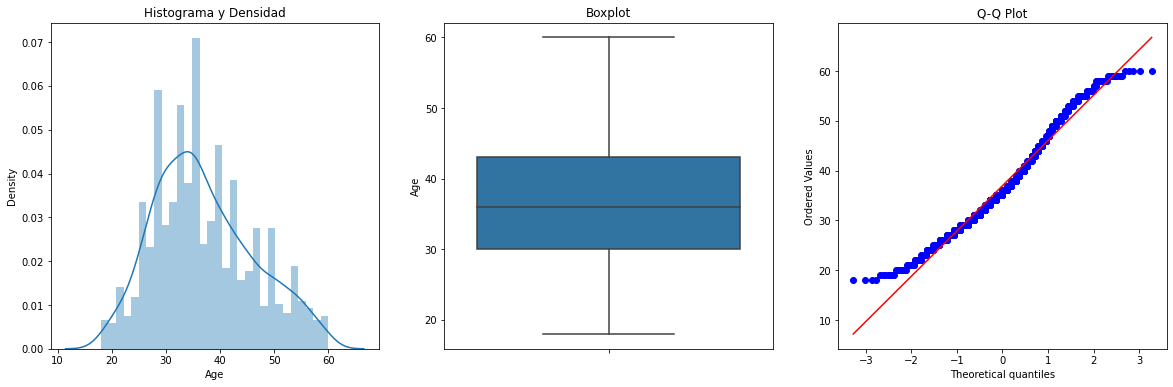

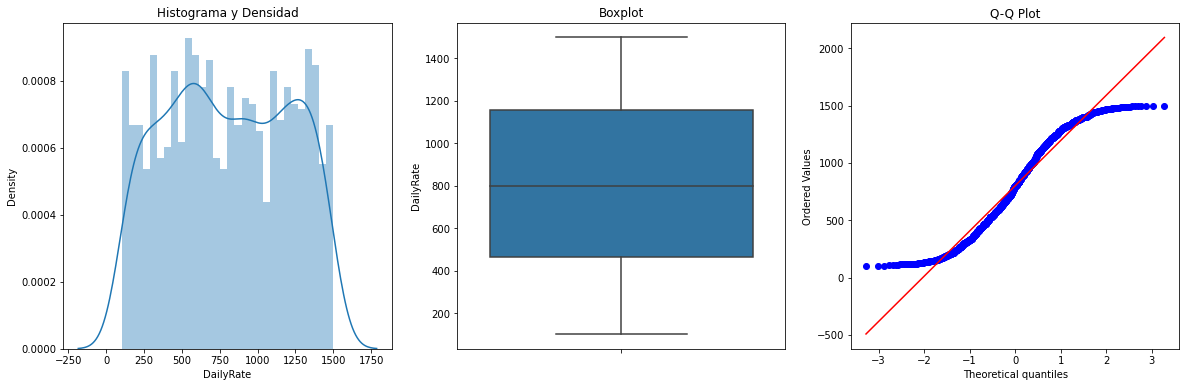

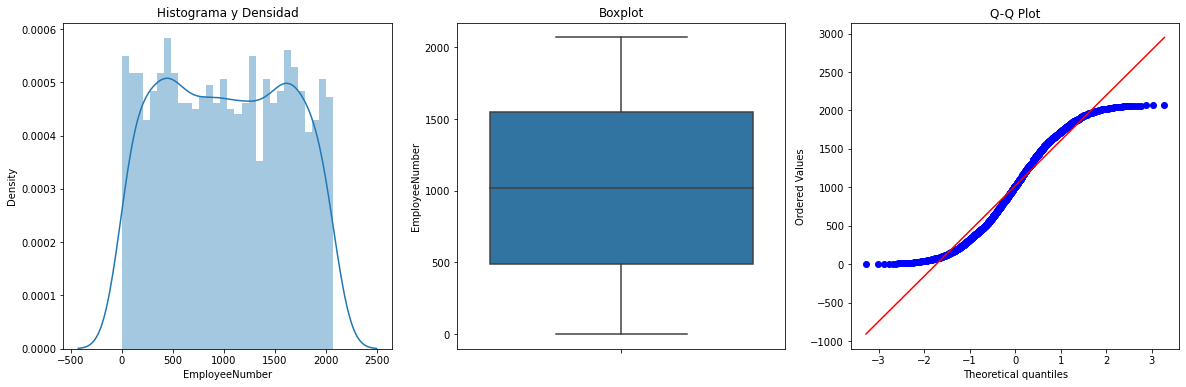

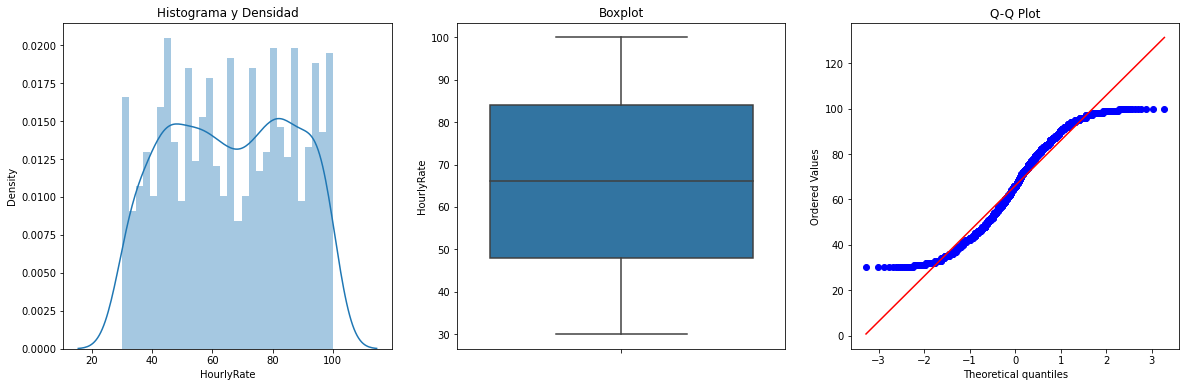

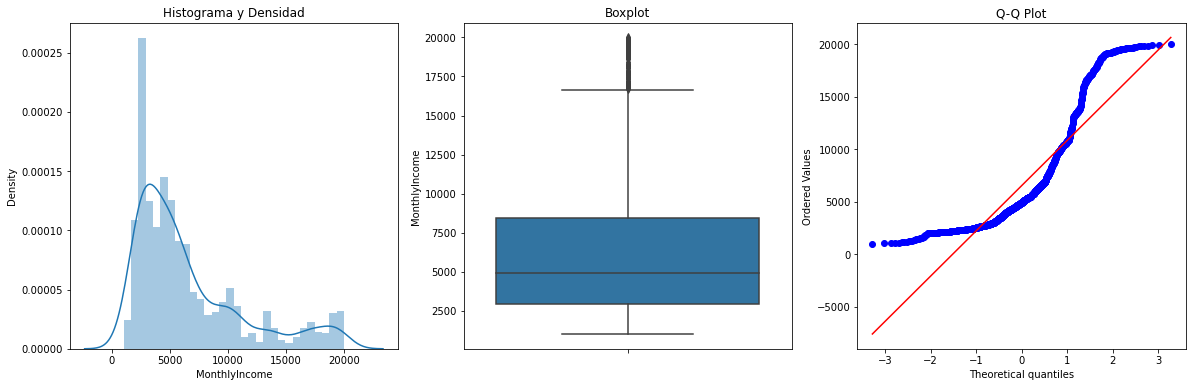

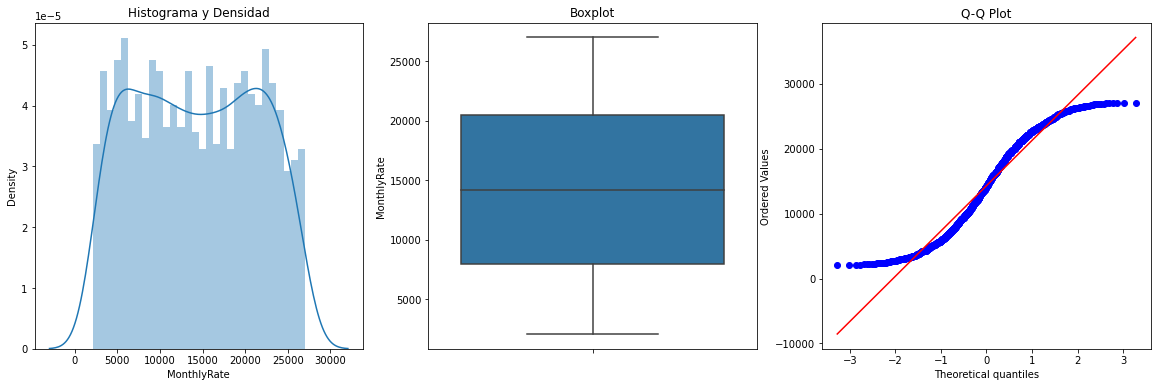

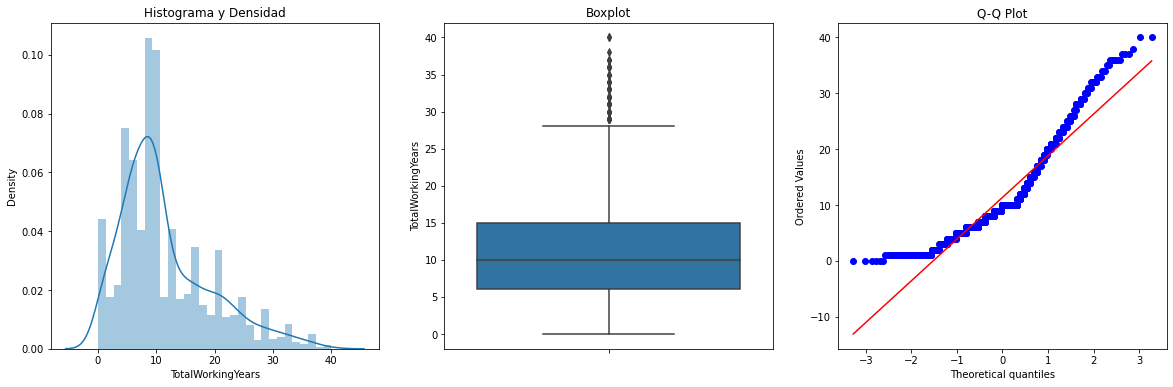

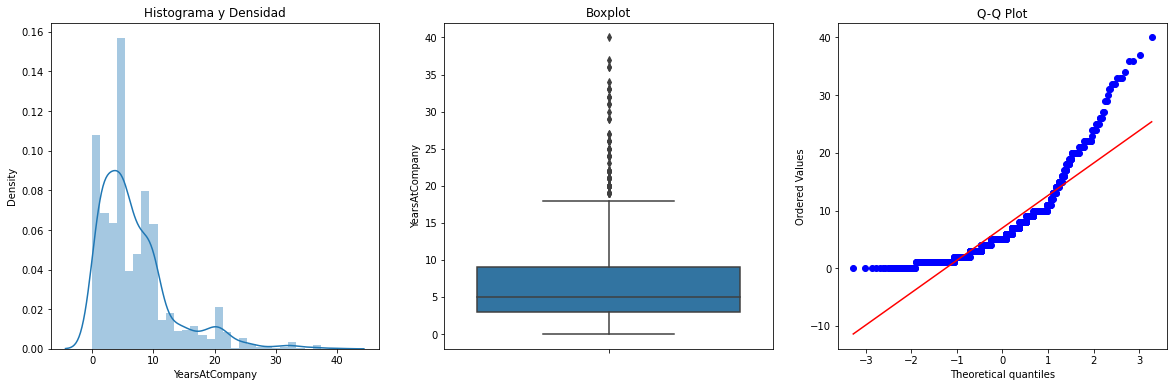

In [148]:
for col in continuas:
    print(f"-----------{col}--------------")
    plotDistBoxQQ(pf,col)

In [149]:
def detectOutliersLimits(dataset, col):
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


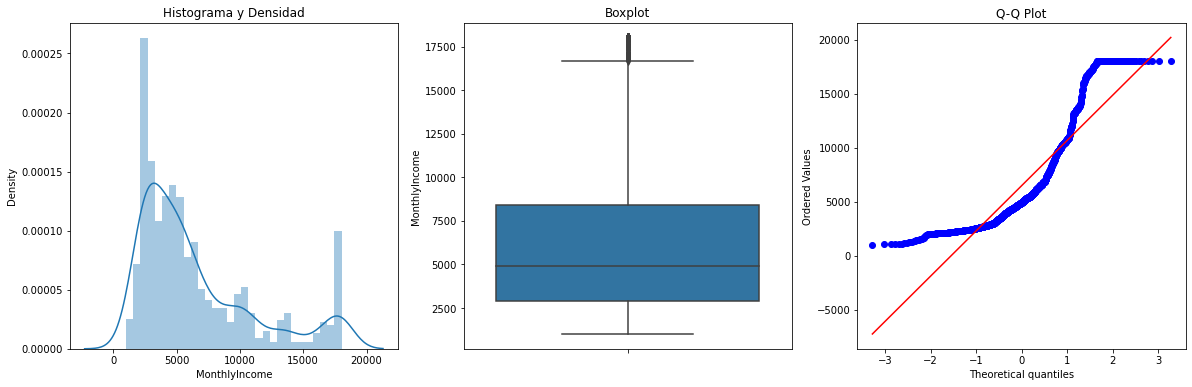

In [161]:
LI, LS = detectOutliersLimits(pf, 'MonthlyIncome')
LI, LS = detectOutliersLimits(pf, 'MonthlyIncome')
pf['MonthlyIncome'] = np.where(pf['MonthlyIncome']  > LS, LS, 
np.where(pf['MonthlyIncome']  < LI, LI, pf['MonthlyIncome'] ))
plotDistBoxQQ(pf, 'MonthlyIncome')

c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


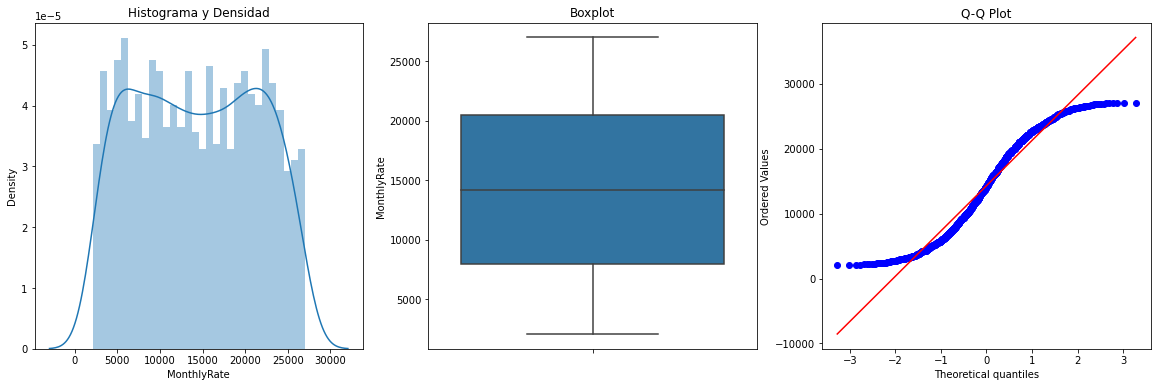

In [162]:
LI, LS = detectOutliersLimits(pf, 'MonthlyRate')
LI, LS = detectOutliersLimits(pf, 'MonthlyRate')
pf['MonthlyRate'] = np.where(pf['MonthlyRate']  > LS, LS, 
np.where(pf['MonthlyRate']  < LI, LI, pf['MonthlyRate'] ))
plotDistBoxQQ(pf, 'MonthlyRate')

c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


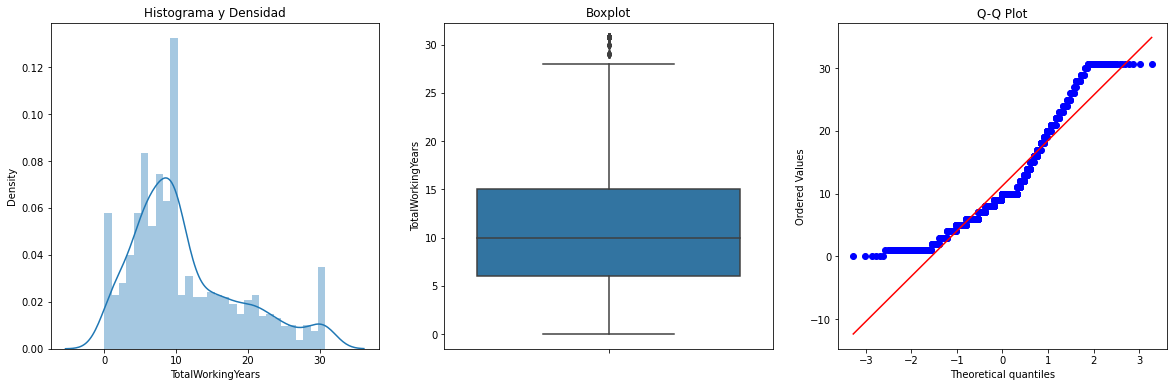

In [163]:
LI, LS = detectOutliersLimits(pf, 'TotalWorkingYears')
LI, LS = detectOutliersLimits(pf, 'TotalWorkingYears')
pf['TotalWorkingYears'] = np.where(pf['TotalWorkingYears']  > LS, LS, 
np.where(pf['TotalWorkingYears']  < LI, LI, pf['TotalWorkingYears'] ))
plotDistBoxQQ(pf, 'TotalWorkingYears')

c:\Users\Andrea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


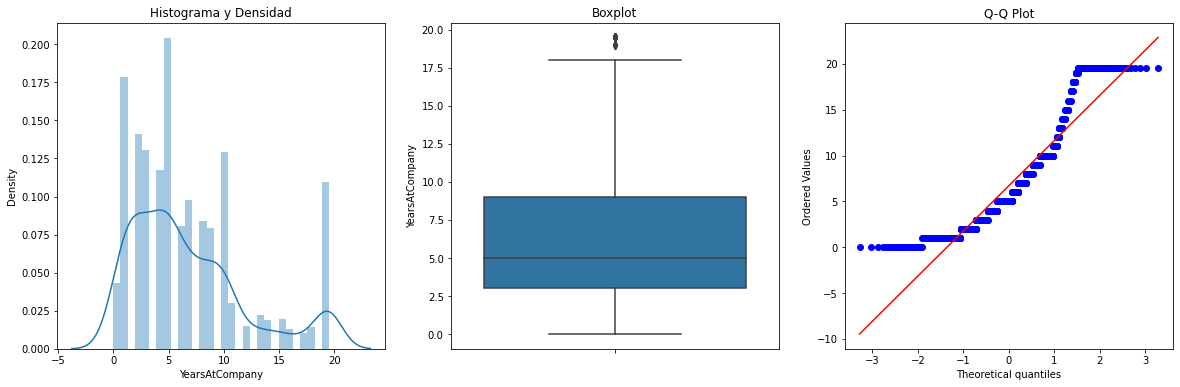

In [164]:
LI, LS = detectOutliersLimits(pf, 'YearsAtCompany')
LI, LS = detectOutliersLimits(pf, 'YearsAtCompany')
pf['YearsAtCompany'] = np.where(pf['YearsAtCompany']  > LS, LS, 
np.where(pf['YearsAtCompany']  < LI, LI, pf['YearsAtCompany'] ))
plotDistBoxQQ(pf, 'YearsAtCompany')

In [170]:
dataset=pf
col=continuas

def plot_density_qq(dataset, col):
     ''' Esta función muestra la gráfica de densisidad y el plot QQ para verificar normalidad. '''

     plt.figure(figsize=(15, 6))
     plt.subplot(1, 2, 1)
     dataset[col].hist(bins=30)
     plt.title("Grafico de densidad")
     plt.subplot(1, 2 ,2)
     stats.probplot(dataset[col], dist='norm', plot=plt)
     plt.title("Q-Q Plot")
     plt.show()

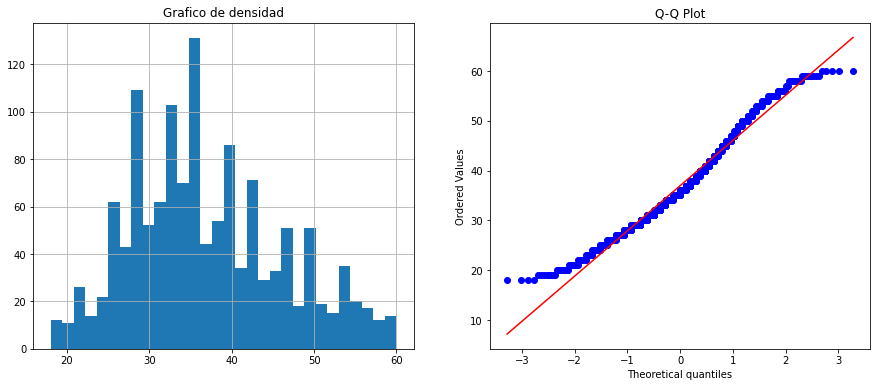

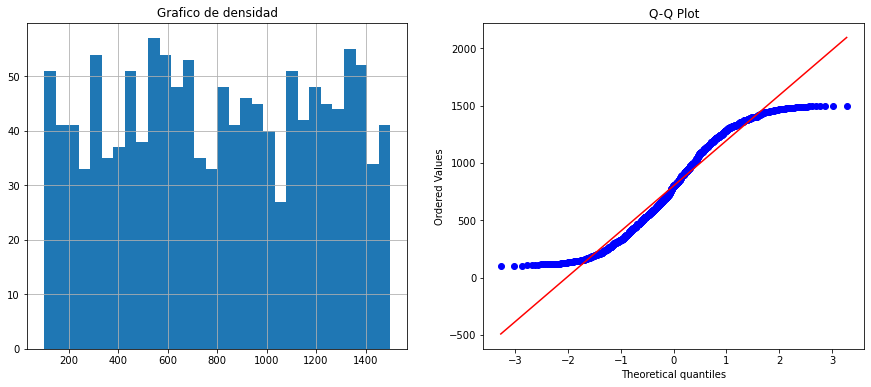

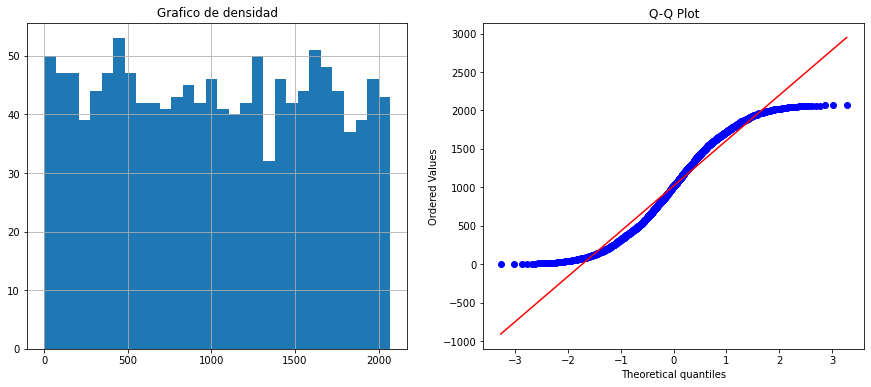

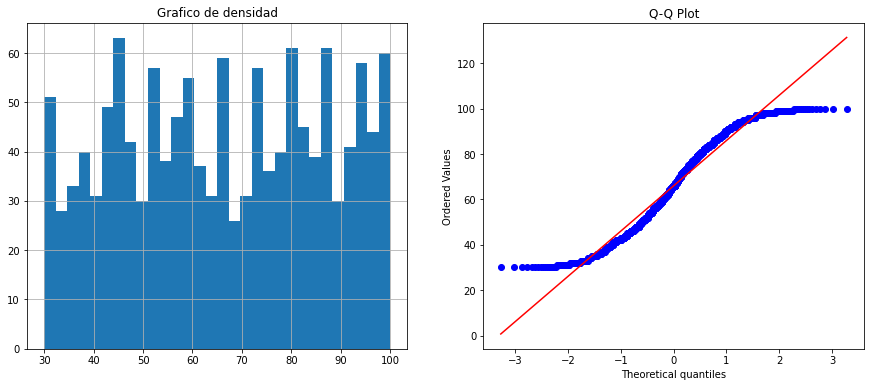

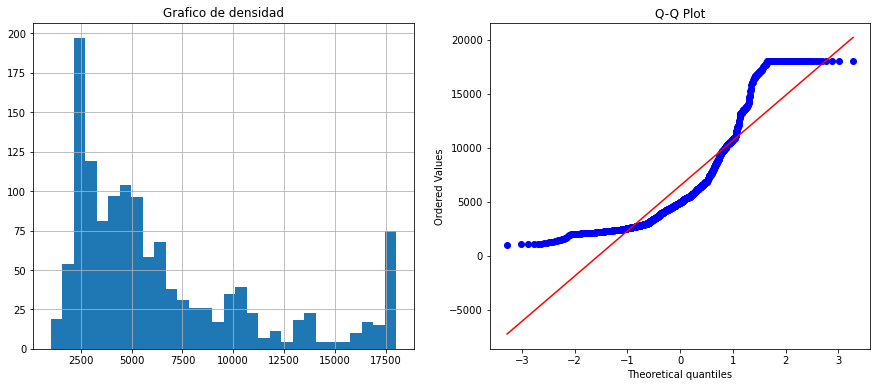

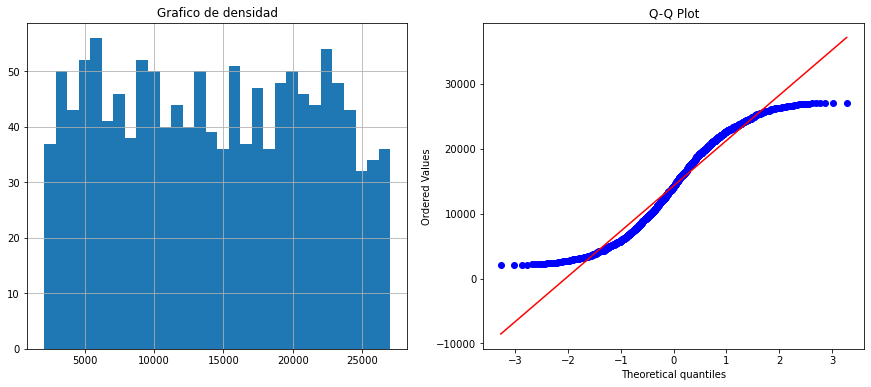

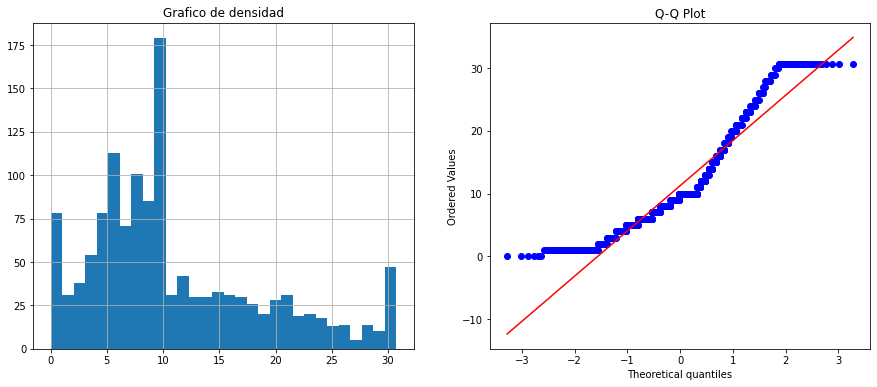

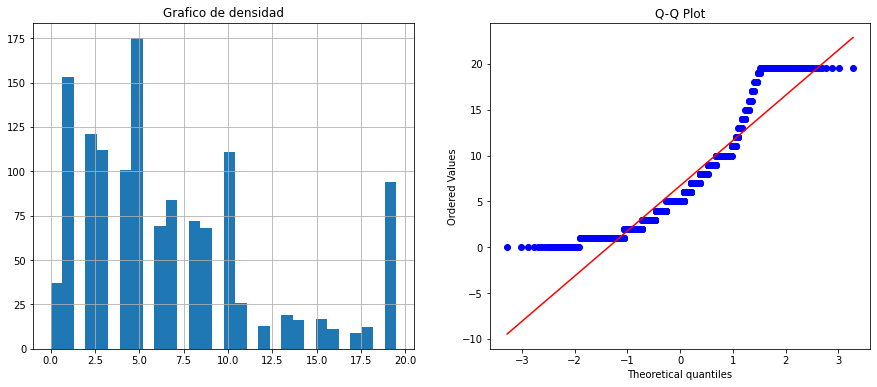

In [171]:
for col in continuas:
     plot_density_qq(pf, col)

In [156]:
pf.to_csv('analytics_employee_attrition_new.csv')